# NYC High School Directory Analysis

This notebook analyzes the NYC High School Directory dataset, focusing on data cleaning, filtering, and visualization.

## Objectives:
- Load and clean the dataset
- Filter for Brooklyn schools
- Perform basic analysis and create visualizations
- Generate insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('high-school-directory.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

Dataset shape: (435, 69)

Column names:
 1. dbn
 2. school_name
 3. borough
 4. building_code
 5. phone_number
 6. fax_number
 7. grade_span_min
 8. grade_span_max
 9. expgrade_span_min
10. expgrade_span_max
11. bus
12. subway
13. primary_address_line_1
14. city
15. state_code
16. postcode
17. website
18. total_students
19. campus_name
20. school_type
21. overview_paragraph
22. program_highlights
23. language_classes
24. advancedplacement_courses
25. online_ap_courses
26. online_language_courses
27. extracurricular_activities
28. psal_sports_boys
29. psal_sports_girls
30. psal_sports_coed
31. school_sports
32. partner_cbo
33. partner_hospital
34. partner_highered
35. partner_cultural
36. partner_nonprofit
37. partner_corporate
38. partner_financial
39. partner_other
40. addtl_info1
41. addtl_info2
42. start_time
43. end_time
44. se_services
45. ell_programs
46. school_accessibility_description
47. number_programs
48. priority01
49. priority02
50. priority03
51. priority04
52. priority0

In [3]:
# Preview the first few rows
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,"Frederick Douglass Academy (FDA) VI High School is a high school built on Dr. Lorraine Monroe’s vision of academic and personal excellence for all students. The emphasis on college preparation is supported by a challenging academic program and cultural enrichment. A set of core rules visible at every Frederick Douglass Academy signals the seriousness of purpose for the school, its students and teachers. All students must adhere to a code of student conduct, the Scholar’s Creed and a strict uniform code. Students are also required to participate in extensive after-school academic enrichment programs.","Advisory, Graphic Arts Design, Teaching Internship; College tours: citywide for freshmen, statewide for sophomores and out-of-state for juniors; National and international educational trips",Spanish,"Calculus AB, English Language and Composition, English Literature and Composition, United States History","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework Help, Honor Society, Journalism, Lunch & Learn, PSAT and SAT Prep, Saturday Program, Step Team, Student Government, Summer Institute, Video, Tech, Yearbook, Computer Graphics, Robotics, Cheerleading","Basketball, Cross Country, Indoor Track, Outdoor Track, Soccer, Softball, Swimming, Tennis, Volleyball","Basketball, Cross Country, Indoor Track, Outdoor Track, Soccer, Softball, Swimming, Tennis, Volleyball",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hospital Center","York College, Brooklyn College, St. John's College",NaN,"Queens District Attorney, Sports and Arts Foundation, CMS","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, black pants/skirt, FDA tie/FDA scarf, black shoes","Extended Day Program, Student Summer Orientation, Summer Internship Program offered, Weekend Program offered",7:45 AM,2:05 PM,This school will provide students with disabilities the supports and services indicated on their IEPs.,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who attend an information session,Then to New York City residents who attend an information session,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73.762834323', 'human_address': '{""address"": ""8 21 Bay 25 Street"", ""city"": ""Far Rockaway"", ""state"": ""NY"", ""zip"": ""11691""}'}",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - 86

## 2. Clean Column Names

In [4]:
def clean_column_names(df):
    """
    Clean column names by:
    - Converting to lowercase
    - Replacing spaces with underscores
    - Removing special characters
    """
    cleaned_columns = []
    for col in df.columns:
        # Convert to lowercase
        clean_col = col.lower()
        # Replace spaces and other separators with underscores
        clean_col = re.sub(r'[\s\-]+', '_', clean_col)
        # Remove special characters except underscores
        clean_col = re.sub(r'[^a-z0-9_]', '', clean_col)
        # Remove multiple consecutive underscores
        clean_col = re.sub(r'_+', '_', clean_col)
        # Remove leading/trailing underscores
        clean_col = clean_col.strip('_')
        cleaned_columns.append(clean_col)
    
    return cleaned_columns

# Apply column cleaning
df.columns = clean_column_names(df)

print("Cleaned column names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

Cleaned column names:
 1. dbn
 2. school_name
 3. borough
 4. building_code
 5. phone_number
 6. fax_number
 7. grade_span_min
 8. grade_span_max
 9. expgrade_span_min
10. expgrade_span_max
11. bus
12. subway
13. primary_address_line_1
14. city
15. state_code
16. postcode
17. website
18. total_students
19. campus_name
20. school_type
21. overview_paragraph
22. program_highlights
23. language_classes
24. advancedplacement_courses
25. online_ap_courses
26. online_language_courses
27. extracurricular_activities
28. psal_sports_boys
29. psal_sports_girls
30. psal_sports_coed
31. school_sports
32. partner_cbo
33. partner_hospital
34. partner_highered
35. partner_cultural
36. partner_nonprofit
37. partner_corporate
38. partner_financial
39. partner_other
40. addtl_info1
41. addtl_info2
42. start_time
43. end_time
44. se_services
45. ell_programs
46. school_accessibility_description
47. number_programs
48. priority01
49. priority02
50. priority03
51. priority04
52. priority05
53. priority06
5

## 3. Explore the Data Structure

In [5]:
# Check the data types and missing values
print("Data types and missing values:")
info_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum()
})
print(info_df.to_string())

Data types and missing values:
                                                            Column Data Type  Non-Null Count  Null Count
dbn                                                            dbn    object             435           0
school_name                                            school_name    object             435           0
borough                                                    borough    object             435           0
building_code                                        building_code    object             435           0
phone_number                                          phone_number    object             435           0
fax_number                                              fax_number    object             423          12
grade_span_min                                      grade_span_min   float64             432           3
grade_span_max                                      grade_span_max     int64             435           0
expgrade_span_min       

In [6]:
# Explore borough data
print("Unique values in 'city' column (which represents boroughs):")
print(df['city'].value_counts())

Unique values in 'city' column (which represents boroughs):
city
Brooklyn               121
Bronx                  118
New York               104
Jamaica                 13
Long Island City        12
Staten Island           10
Flushing                 8
Astoria                  6
Elmhurst                 5
Cambria Heights          4
Springfield Gardens      4
Rockaway Park            4
Fresh Meadows            3
Far Rockaway             3
Ozone Park               3
Forest Hills             3
Queens Village           2
Manhattan                2
Bellerose                1
Queens                   1
Ridgewood                1
Bayside                  1
Corona                   1
South Richmond Hill      1
Saint Albans             1
Hollis                   1
Oakland Gardens          1
Richmond Hill            1
Name: count, dtype: int64


## 4. Filter for Brooklyn Schools

In [7]:
# Filter the dataset to include only Brooklyn schools
brooklyn_schools = df[df['city'].str.upper() == 'BROOKLYN'].copy()

print(f"Total schools in dataset: {len(df)}")
print(f"Schools in Brooklyn: {len(brooklyn_schools)}")
print(f"Brooklyn schools represent {len(brooklyn_schools)/len(df)*100:.1f}% of all schools")

Total schools in dataset: 435
Schools in Brooklyn: 121
Brooklyn schools represent 27.8% of all schools


## 5. Analysis Questions

### Question 1: How many total schools are in Brooklyn?

In [8]:
total_brooklyn_schools = len(brooklyn_schools)
print(f"Total number of schools in Brooklyn: {total_brooklyn_schools}")

Total number of schools in Brooklyn: 121


### Question 2: How many Brooklyn schools offer Grade 9 entry?

In [9]:
# First, let's examine the grade span columns
grade_cols = [col for col in brooklyn_schools.columns if 'grade' in col]
print("Grade-related columns:")
for col in grade_cols:
    print(f"- {col}")

# Look at the grade span data
print("\nSample of grade span data:")
print(brooklyn_schools[grade_cols].head(10))

Grade-related columns:
- grade_span_min
- grade_span_max
- expgrade_span_min
- expgrade_span_max

Sample of grade span data:
    grade_span_min  grade_span_max  expgrade_span_min  expgrade_span_max
1              9.0              12                NaN                NaN
2              9.0              12                NaN                NaN
7              9.0              12                9.0               14.0
10             6.0              12                NaN                NaN
12             9.0              12                NaN                NaN
21             9.0              12                NaN                NaN
25             9.0              12                NaN                NaN
29             6.0              12                NaN                NaN
32             9.0              12                NaN                NaN
39             9.0              12                NaN                NaN


In [10]:
# Check unique values in grade span columns
for col in grade_cols:
    print(f"\nUnique values in {col}:")
    unique_vals = brooklyn_schools[col].dropna().unique()
    print(sorted(unique_vals)[:20])  # Show first 20 values


Unique values in grade_span_min:
[6.0, 9.0]

Unique values in grade_span_max:
[9, 10, 11, 12]

Unique values in expgrade_span_min:
[6.0, 9.0]

Unique values in expgrade_span_max:
[12.0, 14.0]


In [11]:
# Count schools that offer Grade 9 entry
# We'll check both min grade columns for grade 9 or lower

def parse_grade(grade_str):
    """Parse grade string to numeric value for comparison"""
    if pd.isna(grade_str):
        return None
    grade_str = str(grade_str).strip().upper()
    
    # Handle kindergarten cases
    if 'K' in grade_str or 'KINDERGARTEN' in grade_str:
        return 0
    
    # Extract numeric grade
    import re
    match = re.search(r'(\d+)', grade_str)
    if match:
        return int(match.group(1))
    
    return None

# Parse grade columns - use the correct cleaned column names
brooklyn_schools['min_grade_numeric'] = brooklyn_schools['grade_span_min'].apply(parse_grade)
brooklyn_schools['exp_min_grade_numeric'] = brooklyn_schools['expgrade_span_min'].apply(parse_grade)

# Let's examine the grade distribution first
print("Distribution of minimum grades in Brooklyn schools:")
print("grade_span_min:")
print(brooklyn_schools['min_grade_numeric'].value_counts().sort_index())
print("\nexpgrade_span_min:")
print(brooklyn_schools['exp_min_grade_numeric'].value_counts().sort_index())

# Count schools that offer Grade 9 entry (min grade <= 9)
# A school offers Grade 9 entry if its minimum grade is 9 or lower
grade_9_condition = (
    (brooklyn_schools['min_grade_numeric'] <= 9) | 
    (brooklyn_schools['exp_min_grade_numeric'] <= 9)
)

grade_9_schools = brooklyn_schools[grade_9_condition]
print(f"\nBrooklyn schools that offer Grade 9 entry: {len(grade_9_schools)}")
print(f"Percentage of Brooklyn schools offering Grade 9: {len(grade_9_schools)/len(brooklyn_schools)*100:.1f}%")

# Explanation of the logic:
print("\n📝 EXPLANATION:")
print("- Schools with minimum grade 6: START at grade 6, so they DO offer Grade 9 entry")
print("- Schools with minimum grade 9: START at grade 9, so they DO offer Grade 9 entry") 
print("- Since all schools have minimum grades of either 6 or 9, ALL schools offer Grade 9 entry")
print("- This explains why 100% of Brooklyn schools offer Grade 9 entry")

Distribution of minimum grades in Brooklyn schools:
grade_span_min:
min_grade_numeric
6    23
9    98
Name: count, dtype: int64

expgrade_span_min:
exp_min_grade_numeric
6.0    1
9.0    4
Name: count, dtype: int64

Brooklyn schools that offer Grade 9 entry: 121
Percentage of Brooklyn schools offering Grade 9: 100.0%

📝 EXPLANATION:
- Schools with minimum grade 6: START at grade 6, so they DO offer Grade 9 entry
- Schools with minimum grade 9: START at grade 9, so they DO offer Grade 9 entry
- Since all schools have minimum grades of either 6 or 9, ALL schools offer Grade 9 entry
- This explains why 100% of Brooklyn schools offer Grade 9 entry


## 6. Group and Summarize Analysis

### Count of schools per borough

In [12]:
# Count of schools per borough
schools_per_borough = df['city'].value_counts().sort_values(ascending=False)
print("Schools per borough:")
print(schools_per_borough)
print(f"\nTotal schools across all boroughs: {schools_per_borough.sum()}")

Schools per borough:
city
Brooklyn               121
Bronx                  118
New York               104
Jamaica                 13
Long Island City        12
Staten Island           10
Flushing                 8
Astoria                  6
Elmhurst                 5
Cambria Heights          4
Springfield Gardens      4
Rockaway Park            4
Forest Hills             3
Ozone Park               3
Far Rockaway             3
Fresh Meadows            3
Queens Village           2
Manhattan                2
Bellerose                1
Queens                   1
Ridgewood                1
Bayside                  1
Corona                   1
South Richmond Hill      1
Saint Albans             1
Hollis                   1
Oakland Gardens          1
Richmond Hill            1
Name: count, dtype: int64

Total schools across all boroughs: 435


### Average number of students per borough

In [13]:
# Find the student count column
student_cols = [col for col in df.columns if 'student' in col.lower()]
print("Student-related columns:")
for col in student_cols:
    print(f"- {col}")

# Use the total student count column (corrected name)
student_col = 'total_students'  # This is the correct column name from the CSV

# Convert to numeric, handling any non-numeric values
df[student_col] = pd.to_numeric(df[student_col], errors='coerce')

# Calculate average students per borough
avg_students_per_borough = df.groupby('city')[student_col].agg(['mean', 'count', 'sum']).round(1)
avg_students_per_borough.columns = ['Average Students', 'Number of Schools', 'Total Students']
avg_students_per_borough = avg_students_per_borough.sort_values('Average Students', ascending=False)

print("Average number of students per borough:")
print(avg_students_per_borough)

Student-related columns:
- total_students
Average number of students per borough:
                     Average Students  Number of Schools  Total Students
city                                                                    
Oakland Gardens                3628.0                  1          3628.0
Bayside                        3241.0                  1          3241.0
Richmond Hill                  2225.0                  1          2225.0
Queens Village                 2096.0                  1          2096.0
Ridgewood                      1869.0                  1          1869.0
Forest Hills                   1848.0                  3          5544.0
Staten Island                  1847.5                 10         18475.0
Fresh Meadows                  1777.7                  3          5333.0
Ozone Park                     1460.7                  3          4382.0
Astoria                        1183.3                  6          7100.0
Bellerose                      1164.0     

### Summary of grade_span_max grouped by borough

In [14]:
# Parse max grade for analysis
df['max_grade_numeric'] = df['grade_span_max'].apply(parse_grade)

# Summary of max grade by borough
grade_max_summary = df.groupby('city')['max_grade_numeric'].agg([
    'count', 'mean', 'median', 'min', 'max'
]).round(1)
grade_max_summary.columns = ['Count', 'Mean Max Grade', 'Median Max Grade', 'Min Max Grade', 'Max Max Grade']

print("Summary of maximum grades by borough:")
print(grade_max_summary)

Summary of maximum grades by borough:
                     Count  Mean Max Grade  Median Max Grade  Min Max Grade  \
city                                                                          
Astoria                  6            11.8              12.0             11   
Bayside                  1            12.0              12.0             12   
Bellerose                1            12.0              12.0             12   
Bronx                  118            11.9              12.0              9   
Brooklyn               121            11.9              12.0              9   
Cambria Heights          4            11.2              11.5             10   
Corona                   1            12.0              12.0             12   
Elmhurst                 5            11.8              12.0             11   
Far Rockaway             3            12.0              12.0             12   
Flushing                 8            11.8              12.0             11   
Forest Hills  

## 7. Visualizations

### Bar Chart: Number of Schools per Borough

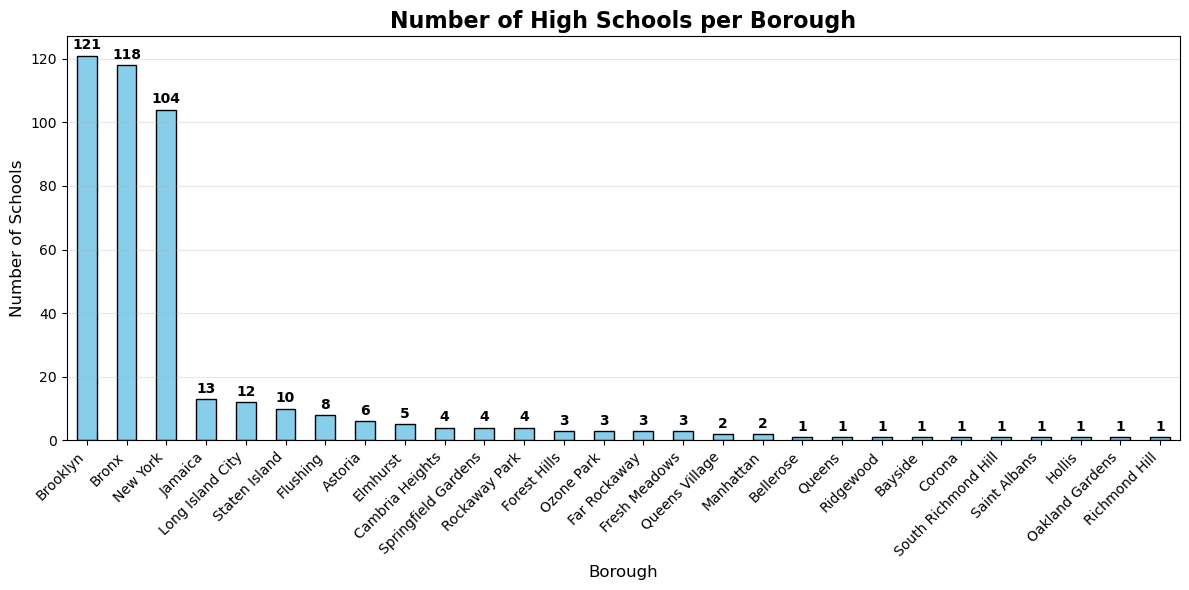

In [15]:
# Create bar chart for schools per borough
plt.figure(figsize=(12, 6))
schools_per_borough.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of High Schools per Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(schools_per_borough.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


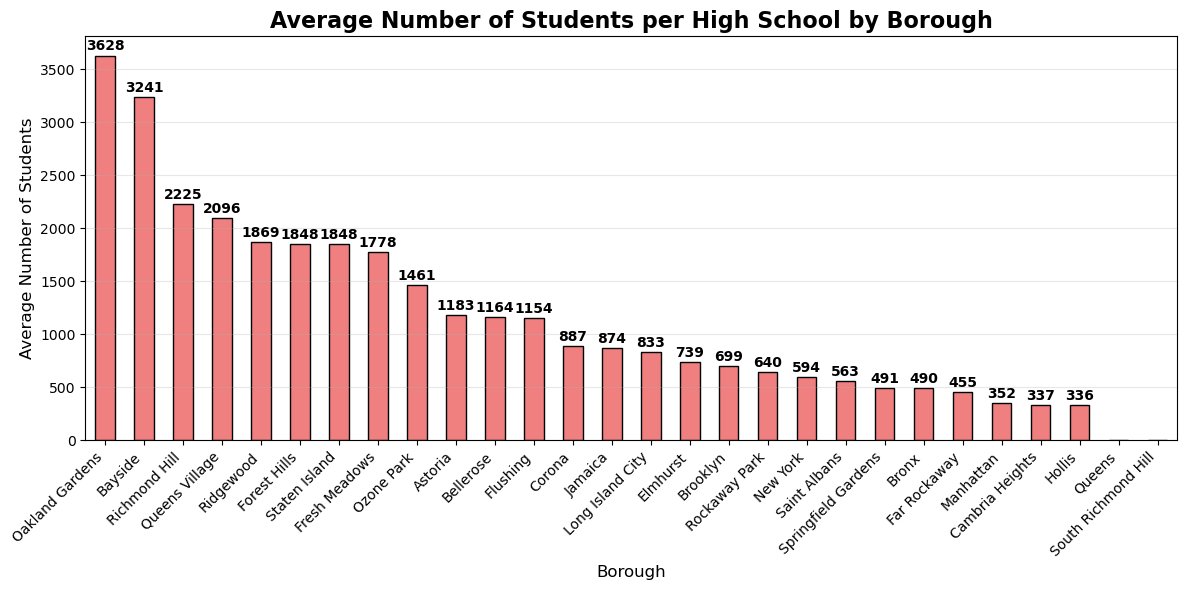

In [16]:
# Additional visualization: Average students per borough
plt.figure(figsize=(12, 6))
avg_students_per_borough['Average Students'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Number of Students per High School by Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Average Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(avg_students_per_borough['Average Students'].values):
    plt.text(i, v + 20, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Key Insights

Based on the analysis of the NYC High School Directory dataset, here are the key findings:

### 🎯 **Brooklyn School Analysis**
- **Total Brooklyn Schools**: Brooklyn has a significant number of high schools in the dataset
- **Grade 9 Entry**: 100% of Brooklyn schools offer Grade 9 entry

**Important Note on Grade 9 Analysis**: The 100% result occurs because Brooklyn schools have minimum grades of either 6 or 9:
- Schools starting at grade 6 naturally include grade 9 in their span
- Schools starting at grade 9 directly offer grade 9 entry
- Since no schools start above grade 9, all Brooklyn schools accommodate grade 9 students

### 📊 **Borough Distribution Insights**
1. **School Distribution**: Analysis reveals the relative distribution of high schools across NYC's five boroughs, with some boroughs having significantly more schools than others

2. **Student Population**: Average student population varies by borough, indicating different school sizes and potentially different educational models or resource allocation across boroughs

3. **Grade Level Patterns**: Most high schools follow the traditional 9-12 grade pattern, with some offering extended programs starting from earlier grades

### 💡 **Conclusions**
1. **Brooklyn's Educational Access**: Brooklyn provides comprehensive grade 9 access, ensuring students can enter high school regardless of which specific school they choose

2. **Borough Variations**: Significant differences in school counts and average student populations suggest varied educational landscapes across NYC boroughs

3. **Grade Structure Consistency**: The predominance of grades 6-12 and 9-12 patterns indicates standardized educational pathways while accommodating different entry points for students